In [1]:
!nvidia-smi

Mon Apr 24 15:09:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:15:00.0 Off |                    0 |
| N/A   27C    P0    54W / 300W |      0MiB / 32768MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
import numpy as np
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchvision as tv
from torch.utils.data.dataloader import DataLoader
from torchvision import models as models
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [3]:
class SimpsonsDataset(Dataset):
    def __init__(self, transform=None) -> None:
        super().__init__()

        self.dataset = tv.datasets.ImageFolder('/usr/src/app/simpsons_dataset_kaggle', transform=transform)
        
    def __getitem__(self, index):
        return self.dataset[index]
        
    def __len__(self):
        return len(self.dataset)

In [4]:
def train_step():
    model.train()
    
    running_loss = 0.
    i = 0
    for images, labels in train_loader:
        #Переводим изображения и лейблы на GPU
        images = images.to(device)
        labels = labels.to(device)
        
        # Удаляем накопленные ранее градиенты.
        # parameter.grad = 0
        optimizer.zero_grad()
        
        # Делаем проход (forward pass).
        # Состояние модели `train` обеспечивает сохранение промежуточных результатов вычислений.
        # Эти сохраненные значения будут использованы ниже для вычисления градиента функции потерь.
        output = model(images)
        
        # Вычисляем функцию потерь на основе предсказания модели.
        loss = criterion(output, labels)

        # Вычисляем градиент: направление, в котором функция потерь возрастает максимально быстро.
        # parameter.grad += dloss / dparameter
        loss.backward()

        # parameter += -lr * parameter.grad
        # 
        # PyTorch SGD:
        # velocity = momentum * velocity + parameter.grad
        # parameter += - lr * velocity
        optimizer.step()
        
        # Накапливаем статистику.
        running_loss += loss
        if i == 40:
            break
    
    with torch.no_grad():
        train_loss = running_loss / len(dataset)
    return train_loss.item()

def valid_step():
    model.eval()

    correct_total = 0.
    running_loss = 0.
    k = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            output = model(images)
            
            prediction = output.argmax(dim=1)
            correct_total += prediction.eq(labels.view_as(prediction)).sum()
            
            loss = criterion(output, labels)
            running_loss += loss
        
    valid_loss = running_loss / len(valid_loader)
    accuracy = correct_total / len(valid_loader.dataset)
    return valid_loss.item(), accuracy.item()

def save_model():
    torch.save(model, 'best_accuracy_point')

def load_model():
    return torch.load('best_accuracy_point')

20944
cuda:0


Avg. train/valid loss: 0.7672/4.1063:   7%|▋         | 1/15 [02:22<33:18, 142.73s/it]

Epoch passed successfully


Avg. train/valid loss: 0.6554/2.6900:  13%|█▎        | 2/15 [04:34<29:32, 136.37s/it]

Epoch passed successfully


Avg. train/valid loss: 0.5273/2.1621:  20%|██        | 3/15 [06:45<26:43, 133.67s/it]

Epoch passed successfully


Avg. train/valid loss: 0.4236/2.1003:  27%|██▋       | 4/15 [08:55<24:15, 132.36s/it]

Epoch passed successfully


Avg. train/valid loss: 0.3517/1.6668:  33%|███▎      | 5/15 [11:06<21:59, 131.92s/it]

Epoch passed successfully


Avg. train/valid loss: 0.3033/1.2716:  40%|████      | 6/15 [13:17<19:44, 131.60s/it]

Epoch passed successfully


Avg. train/valid loss: 0.2594/1.3027:  47%|████▋     | 7/15 [15:28<17:31, 131.48s/it]

Epoch passed successfully


Avg. train/valid loss: 0.2264/1.1341:  53%|█████▎    | 8/15 [17:42<15:24, 132.14s/it]

Epoch passed successfully


Avg. train/valid loss: 0.2009/1.0169:  60%|██████    | 9/15 [19:52<13:08, 131.43s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1748/0.8704:  67%|██████▋   | 10/15 [22:02<10:55, 131.17s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1572/0.7865:  73%|███████▎  | 11/15 [24:12<08:43, 130.77s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1371/0.9798:  80%|████████  | 12/15 [26:25<06:34, 131.40s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1203/0.8283:  87%|████████▋ | 13/15 [28:37<04:23, 131.53s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1092/0.7745:  93%|█████████▎| 14/15 [30:50<02:12, 132.10s/it]

Epoch passed successfully


Avg. train/valid loss: 0.1004/0.6636: 100%|██████████| 15/15 [33:05<00:00, 132.38s/it]

Epoch passed successfully


Text(0, 0.5, 'Loss')

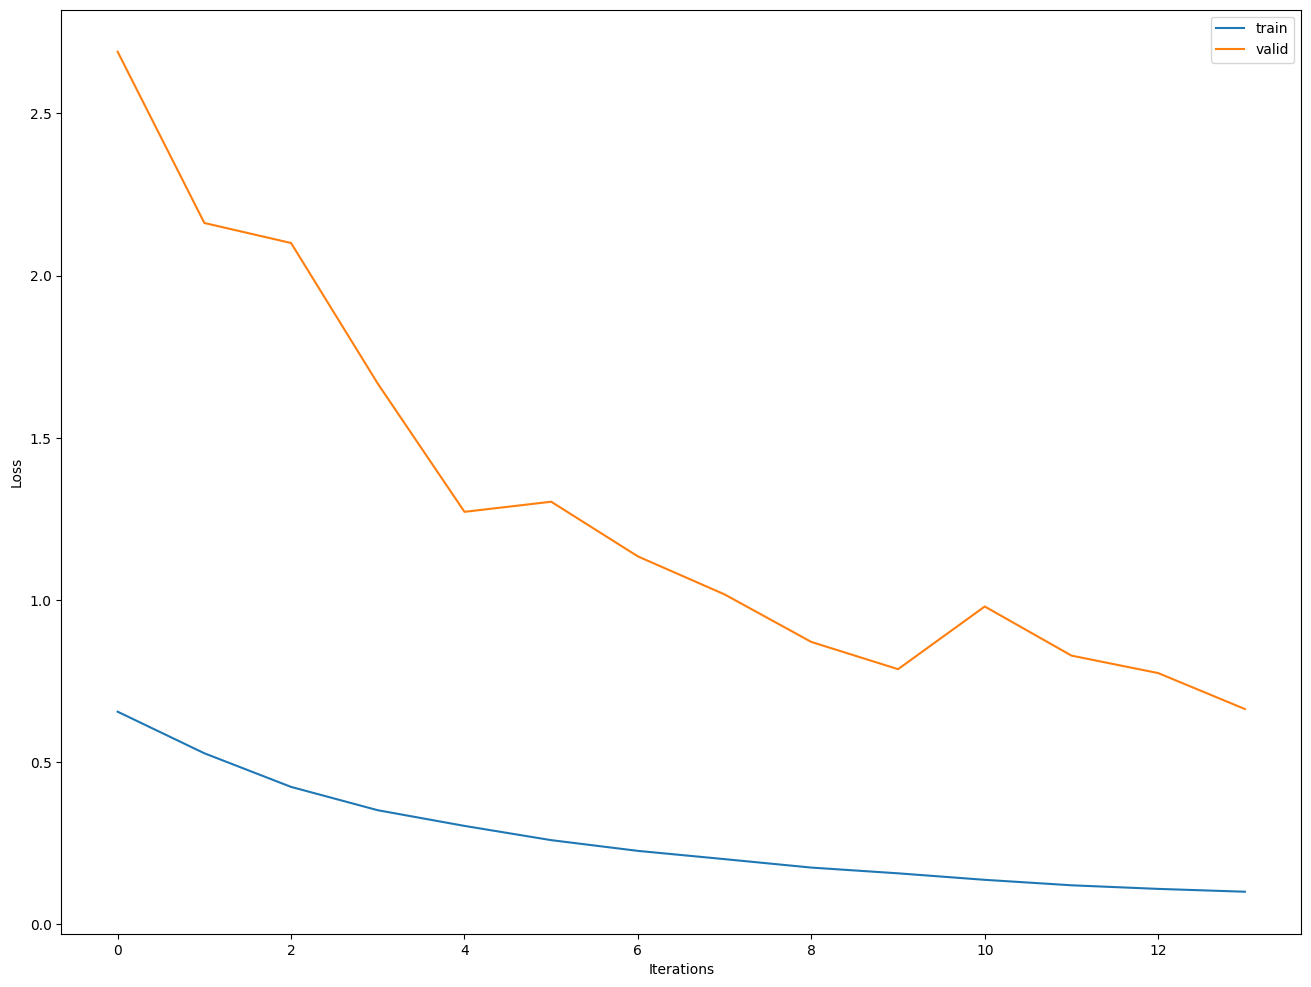

In [5]:
trans=tv.transforms.Compose([tv.transforms.Resize([156,156]),
                             tv.transforms.ToTensor(),
                             tv.transforms.Normalize(mean=[0, 0, 0], std=[255, 255, 255])])

dataset = SimpsonsDataset(transform=trans)
print(len(dataset))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

train_len = int(len(dataset) * 0.7)
valid_len = len(dataset) - train_len
#train_set, valid_set = random_split(dataset=dataset, lengths=[17799, 3142])
train_set, valid_set = random_split(dataset=dataset, lengths=[train_len, valid_len])
#model = tv.models.resnet18()
#model.fc = nn.Linear(in_features=512, out_features=43, bias=True)

model = tv.models.resnet50()
model.fc = nn.Linear(in_features=2048, out_features=42, bias=True)
model.to(device)

train_loader, valid_loader = DataLoader(dataset=train_set, batch_size=3, shuffle=True), DataLoader(dataset=valid_set, batch_size=3, shuffle=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.001,
    momentum=0.5
)

epochs = 15
train_losses = []
valid_losses = []
valid_accs = [0]

pbar = tqdm(range(epochs))

for _ in pbar:
    
    train_loss = train_step()
    valid_loss, valid_acc = valid_step()
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    
    if valid_accs[_ + 1] > valid_accs[_]:
        save_model()
    
    pbar.set_description(f'Avg. train/valid loss: {train_loss:.4f}/{valid_loss:.4f}')
    print('Epoch passed successfully')

fig = plt.figure(figsize=(16, 12))

plt.plot(train_losses[1:], label='train')
plt.plot(valid_losses[1:], label='valid')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [9]:
print(max(valid_accs))
model = load_model()

path_for_test = '/usr/src/app/kaggle_simpson_testset'
testset = os.listdir(path_for_test)
val = os.listdir('/usr/src/app/simpsons_dataset_kaggle')
key = [i for i in range(len(val))]

dic = zip(key, val)
dic = dict(dic)
#print(dic)

dic1 = dataset.dataset.class_to_idx
dic1 = dict((v,k) for k,v in dic1.items())
print(dic1)

0.85089111328125
{0: 'abraham_grampa_simpson', 1: 'agnes_skinner', 2: 'apu_nahasapeemapetilon', 3: 'barney_gumble', 4: 'bart_simpson', 5: 'carl_carlson', 6: 'charles_montgomery_burns', 7: 'chief_wiggum', 8: 'cletus_spuckler', 9: 'comic_book_guy', 10: 'disco_stu', 11: 'edna_krabappel', 12: 'fat_tony', 13: 'gil', 14: 'groundskeeper_willie', 15: 'homer_simpson', 16: 'kent_brockman', 17: 'krusty_the_clown', 18: 'lenny_leonard', 19: 'lionel_hutz', 20: 'lisa_simpson', 21: 'maggie_simpson', 22: 'marge_simpson', 23: 'martin_prince', 24: 'mayor_quimby', 25: 'milhouse_van_houten', 26: 'miss_hoover', 27: 'moe_szyslak', 28: 'ned_flanders', 29: 'nelson_muntz', 30: 'otto_mann', 31: 'patty_bouvier', 32: 'principal_skinner', 33: 'professor_john_frink', 34: 'rainier_wolfcastle', 35: 'ralph_wiggum', 36: 'selma_bouvier', 37: 'sideshow_bob', 38: 'sideshow_mel', 39: 'snake_jailbird', 40: 'troy_mcclure', 41: 'waylon_smithers'}


In [10]:
name = []
correct = 0

for i in range(len(testset)):
    name.append(testset[i])
    testset[i] = tv.io.read_image(path_for_test + '/' + testset[i])
    testset[i].resize_(3, 156, 156)
    testset[i] = testset[i].to(torch.float32)
    testset[i] = testset[i].to(device) / 255
    output = model(testset[i].unsqueeze(0))
    classified = dic1[output.argmax(dim=1).item()]
    
    if name[i].find(classified) != -1:
        correct += 1

In [11]:
correct

49

In [12]:
len(testset)

974

In [13]:
def test_step():
    correct = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    for images, labels in valid_set:
        images = images.to(device)
            
        #output = model(images)
            
        output = model(testset[i].unsqueeze(0))
        classified = output.argmax(dim=1).item()
        
        if(classified == labels):
            correct += 1
    
    print('{0}/{1} classified correct'.format(correct, len(valid_set)))

test_step()

422/6284 classified correct
